In [5]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import math

**Многоклассовая классификация**
1. Загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)
2. Осмотрите данные и метки.
3. попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.
4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации.
5. Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.
6. Сравните качество стратегий OvR и OvO.

**Логистическая регрессия**

1. Возьмите датасет с данными по телефонной компании с прошлых уроков.
2. Подготовьте данные для обучения.
3. Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)
4. Обучите логистическую регрессию на нормированных данных.
5. Посчитайте метрики на тестовом и обучающем множествах.

**1. Загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)**

In [6]:
# Загружаем датасет
digits = load_digits()

Выводим информацию о датасете:
print(digits.DESCR) 
Набор данных оптического распознавания рукописных цифр
--------------------------------------------------
Характеристики набора данных:
    
    :Количество экземпляров: 1797
    :Количество атрибутов: 64
    :Информация об атрибутах: изображение 8x8 из целочисленных пикселей в диапазоне 0..16.
    :Отсутствующие значения атрибутов: Нет
   
Это копии тестового набора данных UCI ML по рукописным цифрам.
Набор данных содержит изображения рукописных цифр: 10 классов, где
каждый класс относится к одной цифре.

**2. Осмотрите данные и метки.**

In [7]:
# Получаем данные и метки
data = digits.data
target = digits.target

In [8]:
data.shape, target.shape

((1797, 64), (1797,))

In [9]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
data[0]# берём 1ю строку

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].reshape(8, 8) # массив 8 на 8

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

**3. попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.**

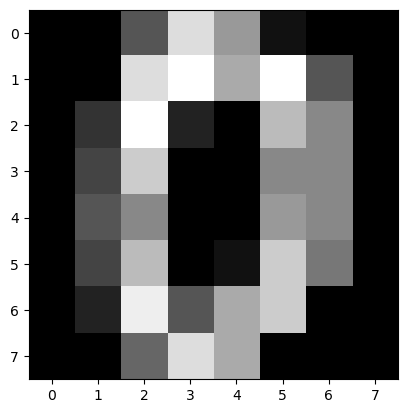

In [12]:
# Отображаем одно изображение из датасета
plt.imshow(data[0].reshape(8, 8), cmap='gray')
plt.show()

**4. Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации.**

**Многоклассовая классификация**

In [13]:
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score

In [14]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [15]:
SGDclf.fit(data,target)

SGDClassifier(random_state=42)

SGDclf.score - это метод объекта классификатора, который вычисляет среднюю точность (accuracy) предсказаний на тестовом наборе данных. Метод score принимает на вход признаковую матрицу и соответствующие им целевые значения (метки классов) тестового набора данных, а затем возвращает значение точности классификации.

In [16]:
SGDclf.score(data,target) 

0.9699499165275459

SGDclf.predict - это метод объекта классификатора, который принимает на вход признаковую матрицу и возвращает предсказанные метки классов для каждого объекта из этой матрицы. используется для применения обученной модели на новых данных (например, тестовом наборе данных), чтобы получить предсказания классов для каждого объекта в этом наборе.

In [17]:
pred = SGDclf.predict(data)

In [18]:
pred

array([0, 1, 2, ..., 8, 9, 8])

confusion_matrix(target, pred) - это функция из библиотеки sklearn.metrics, которая используется для вычисления матрицы неточностей (confusion matrix) между истинными метками классов target и предсказанными метками классов pred.

Матрица неточностей - это таблица, которая показывает, как много объектов каждого класса были корректно или некорректно классифицированы моделью. Она часто используется для оценки качества работы классификатора.

**5. Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.**

In [21]:
cm = confusion_matrix(target, pred)
print(cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 164   1   1   0   0   0   0  14   2]
 [  0   0 176   0   0   0   0   0   1   0]
 [  0   0   0 166   0   5   0   1   8   3]
 [  0   1   0   0 174   1   1   1   1   2]
 [  0   0   0   0   0 180   0   0   1   1]
 [  0   0   0   0   0   0 180   0   1   0]
 [  0   0   0   0   0   0   0 175   1   3]
 [  0   1   0   0   0   0   0   0 173   0]
 [  0   0   0   0   0   0   0   0   3 177]]


**Выводы**

 В 14  случаях классификатор принял '1' за '8'; 

В  8  случаях классификатор принял '3' за '8';

В  5  случаях классификатор принял '3' за '5';

В  3  случаях классификатор принял '3' за '9';

В  3  случаях классификатор принял '7' за '9';

В  2  случаях классификатор принял '1' за '9';

В  3  случаях классификатор принял '9' за '8';

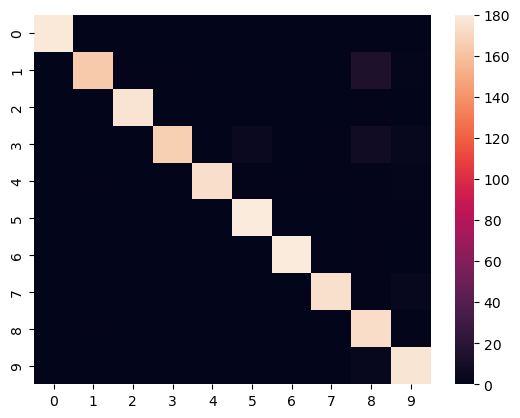

In [22]:
sns.heatmap(cm);

**6. Сравните качество стратегий OvR и OvO.**

**OvR**

In [23]:
# макро - считает метрики для каждой метки и берет среднее значение, независимо от размена. 
#precision_score(target, pred, average = 'macro'), recall_score(target, pred, average = 'macro'), f1_score(target, pred, average = 'macro') 

In [26]:
SGDclf.decision_function([data[0]]) # выбираем наибольшее значение

array([[ 1942.42587775, -5378.4043211 , -2562.27079009, -1955.58617904,
        -2091.08762485, -1348.40635089, -2061.00294552, -1188.5116464 ,
         -609.24042194,  -781.48905294]])

In [27]:
SGDclf.predict([data[0]])

array([0])

In [28]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**OvO**
 
 (One-vs-One) - это метод бинарной классификации, который используется в задачах многоклассовой классификации. Суть метода заключается в том, чтобы обучать классификаторы для каждой пары классов. То есть, если у нас есть K классов, то нам нужно обучить K*(K-1)/2 классификаторов.  Каждый классификатор обучается на подмножестве данных, содержащем только два класса. Затем, для классификации нового объекта, мы применяем все K*(K-1)/2 классификаторов и выбираем класс, который набрал наибольшее количество голосов.


In [29]:
from sklearn.multiclass import OneVsOneClassifier 

In [30]:
ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(data,target)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [31]:
ovoSGD.decision_function([data[65]])

array([[5.33317651, 5.3332988 , 4.66730856, 1.6666775 , 6.33326825,
        2.66670422, 9.33332876, 0.66667661, 8.33332392, 0.66667314]])

In [32]:
ovoSGD.predict([data[65]])

array([6])

In [33]:
ovoSGD.estimators_

(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassi

In [56]:
pred = ovoSGD.predict(data)

In [57]:
# макро - считает метрики для каждой метки и берет среднее значение. 
precision_score(target, pred, average = 'macro'), recall_score(target, pred, average = 'macro'), f1_score(target, pred, average = 'macro') 

(1.0, 1.0, 1.0)

Выводы? 

** OvR и ** OvO 

**1. Возьмите датасет с данными по телефонной компании с прошлых уроков.**

***Логистическая регрессия***

In [166]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
mm = MinMaxScaler()

In [167]:
# Загрузка данных / chunksize=None
df = pd.read_csv('churn-bigml-80.csv')

**2. Подготовьте данные для обучения.**

In [168]:
df['International plan'] = df['International plan'].map({'No':0, 'Yes':1})
df['Voice mail plan'] = df['Voice mail plan'].map({'No':0, 'Yes':1})
df['Churn'] = df['Churn'].map({False:0, True:1})

In [169]:
X_train = df.drop(['State', 'Account length', 'Area code' , 'Churn'], axis = 1)
y_train = df['Churn']

In [170]:
# Загрузка данных test
df1 = pd.read_csv('churn-bigml-20.csv')

In [171]:
df1['International plan'] = df1['International plan'].map({'No':0, 'Yes':1})
df1['Voice mail plan'] = df1['Voice mail plan'].map({'No':0, 'Yes':1})
df1['Churn'] = df1['Churn'].map({False:0, True:1})

In [172]:
X_test = df1.drop(['State', 'Account length', 'Area code' , 'Churn'], axis = 1)
y_test = df1['Churn']

In [173]:
X_train.shape,y_train.shape

((2666, 16), (2666,))

**3. Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)**

In [174]:
mm = MinMaxScaler() # создаем объект для нормировки данных
X_train_norm = mm.fit_transform(X_train)# нормируем обучающее множество
X_test_norm = mm.transform(X_test)# нормируем тестовое множество

In [175]:
X_train_norm

array([[0.        , 1.        , 0.5       , ..., 0.15      , 0.5       ,
        0.11111111],
       [0.        , 1.        , 0.52      , ..., 0.15      , 0.68518519,
        0.11111111],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.60925926,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2       , 0.47962963,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.3       , 0.70555556,
        0.22222222],
       [0.        , 1.        , 0.5       , ..., 0.2       , 0.68518519,
        0.        ]])

In [176]:
X_test_norm

array([[0.        , 0.        , 0.        , ..., 0.2       , 0.43518519,
        0.11111111],
       [0.        , 0.        , 0.        , ..., 0.3       , 0.63518519,
        0.44444444],
       [0.        , 0.        , 0.        , ..., 0.45      , 0.27037037,
        0.44444444],
       ...,
       [0.        , 0.        , 0.        , ..., 0.4       , 0.65925926,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.2       , 0.57962963,
        0.11111111],
       [1.        , 0.        , 0.        , ..., 0.5       , 0.25      ,
        0.22222222]])

In [177]:
X_train_norm.shape, X_test_norm.shape

((2666, 16), (667, 16))

**4. Обучите логистическую регрессию на нормированных данных.**

In [220]:
from sklearn.linear_model import LogisticRegression
# создание объекта класса LogisticRegression
logReg = LogisticRegression()

In [221]:
logReg.fit(X_train_norm, y_train) #обучаем классификатор на нормированных данных

LogisticRegression()

In [222]:
logReg.score(X_test_norm, y_test)

0.8545727136431784

In [223]:
# предсказание на обучающем множестве
y_train_pred = logReg.predict(X_train_norm)

In [224]:
#делаем прогноз
logReg.predict([X_test_norm[2]])

array([1], dtype=int64)

In [225]:
logReg.predict([X_test_norm[2]]).sum()

1

In [226]:
logReg.predict_proba([X_test_norm[2]])

array([[0.446193, 0.553807]])

**5. Посчитайте метрики на тестовом и обучающем множествах.**

In [227]:
# оценка качества модели на обучающих данных
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

In [228]:
train_accuracy, train_precision, train_recall,train_f1

(0.8653413353338335,
 0.6218487394957983,
 0.19072164948453607,
 0.29191321499013806)

In [229]:
# применение обученной модели к тестовым данным
y_test_pred = logreg.predict(X_test_norm)

In [230]:
# оценка качества модели на тестовых данных
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

In [231]:
accuracy, precision, recall, f1

(0.8545727136431784,
 0.4642857142857143,
 0.1368421052631579,
 0.21138211382113825)


Здесь мы используем функции `accuracy_score()`, `precision_score()`, `recall_score()` и `f1_score()` из модуля `sklearn.metrics` для подсчета метрик. Все эти функции принимают два аргумента: истинные метки классов и предсказанные метки классов. 

Метрика accuracy (точность) показывает долю правильных ответов модели. Метрики precision (точность), recall (полнота) и F1-мера являются метриками качества классификации, которые учитывают как правильно определены положительные классы (precision), так и как правильно определены все положительные примеры (recall). F1-мера является средним гармоническим между precision и recall. 

Из-за того, что данные разделены на обучающий и тестовый наборы, мы можем оценить качество модели как на тех данных, на которых она обучалась (train), так и на новых данных, которые она не видела ранее (test).


In [232]:
confusion_matrix(y_test, y_test_pred)

array([[557,  15],
       [ 82,  13]], dtype=int64)